<a href="https://colab.research.google.com/github/JoYBoy7214/emotion_and_action_recognition/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
 98% 1.94G/1.98G [00:12<00:00, 203MB/s]
100% 1.98G/1.98G [00:12<00:00, 168MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/emotion-recognition-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!pip install tensorflow
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


csv_path = '/content/HumanActionRecognition/Training_set.csv'


image_dir = '/content/HumanActionRecognition/train'


In [ ]:
mv /content/dataset/Ahegao /content/excluded_classes/


In [ ]:
mv /content/dataset/Angry /content/excluded_classes/

In [ ]:



# 1. Create an ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data for validation
)

# 2. Load training data (80%)
train_data = datagen.flow_from_directory(
    'dataset/',              # root directory of dataset
    target_size=(224, 224),  # Resize all images to 224x224 (MobileNetV2 requirement)
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# 3. Load validation data (20%)
val_data = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 10350 images belonging to 4 classes.
Found 2585 images belonging to 4 classes.


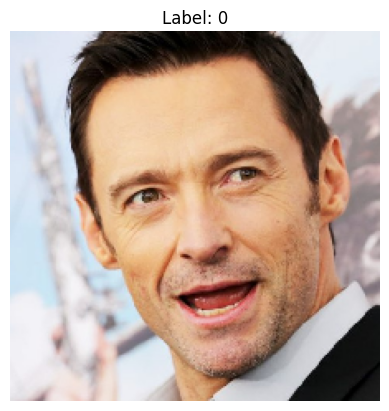

{'Happy': 0, 'Neutral': 1, 'Sad': 2, 'Surprise': 3}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch
images, labels = next(train_data)

# Show first image in the batch
plt.imshow(images[0])
plt.title(f"Label: {np.argmax(labels[0])}")
plt.axis('off')
plt.show()
print(train_data.class_indices)


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.4879 - loss: 1.1740 - val_accuracy: 0.5830 - val_loss: 0.9828
Epoch 2/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.6468 - loss: 0.8238 - val_accuracy: 0.5764 - val_loss: 1.0217
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.6809 - loss: 0.7567 - val_accuracy: 0.6074 - val_loss: 0.9400
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.7068 - loss: 0.6970 - val_accuracy: 0.6217 - val_loss: 0.9187
Epoch 5/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.7331 - loss: 0.6567 - val_accuracy: 0.5903 - val_loss: 1.0278
Epoch 6/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.7421 - loss: 0.6218 - val_accuracy: 0.6221 - val_loss: 0.9693
Epoch 7/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.7745 - loss: 0.5507 - val_accuracy: 0.6232 - val_loss: 1.0077
Epoch 8/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.7978 - loss: 0.5117 - val_accu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/emotion_model.keras')

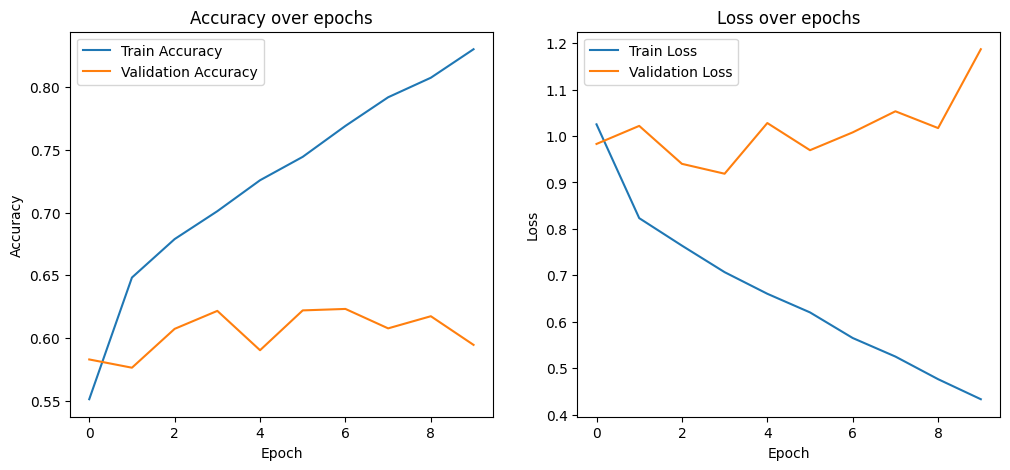

In [ ]:


# Save the history dict
import numpy as np
np.save('/content/drive/MyDrive/history.npy', history.history)

# Plot accuracy and loss graphs
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/test5.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize same as training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize (same as training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


FileNotFoundError: [Errno 2] No such file or directory: '/content/test5.jpg'

In [ ]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
print(predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

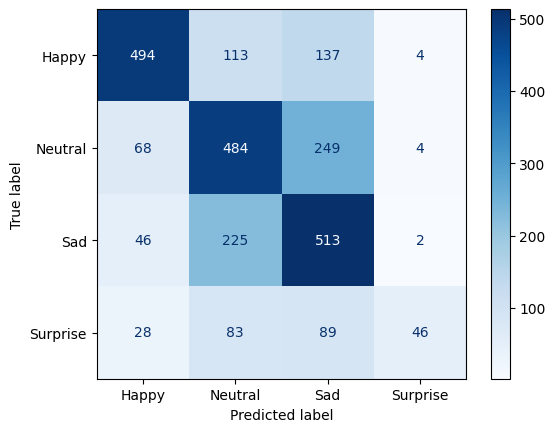

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions and true labels for the entire validation set
y_true = []
y_pred = []

# Go through validation data batch by batch
for i in range(len(val_data)):
    X_batch, y_batch = val_data[i]
    preds = model.predict(X_batch)

    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

    # Break once we've seen all validation samples
    if len(y_true) >= val_data.samples:
        break

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
disp.plot(cmap='Blues')
